# **Sentiment Analysis** using IMDB reviews
* **Name:** Arsalan Ali
* **Email:** arslanchaos@gmail.com

## **Introduction**
IMDB dataset consits of 50k movie reviews. The dataset contains 2 columns (review and sentiment)<br> that will help us identify whether a review is positive or negative.<br>
## **Problem Statement**
Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).

## **Data Preparation**

In [1]:
# Importing essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing dataset
df_review = pd.read_csv('IMDB Dataset.csv')
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


### Shrinking Dataset for Faster calculation

In [3]:
df_review = df_review.sample(2000)

In [4]:
df_review

,review,sentiment
11956,Sometimes good things happen by accident.<br /...,positive
38248,<br /><br /> I suppose this is not the best fi...,positive
19551,This puddle of derivative drivel stole from ev...,negative
39069,"Zero Day leads you to think, even re-think why...",positive
46624,"This movie came highly recommended, but I am n...",negative
...,...,...
3216,Mickey Rourke is enjoying a renaissance at the...,negative
22918,It's been a while since seeing this the first ...,negative
47440,"Jess is 18, very smart and wants nothing more ...",positive
27208,I think the biggest failing something can have...,negative


## **Exploratory Data Analysis (EDA)**

### Data Shape

In [5]:
# Step 1: Data shape
print(df_review.shape)
rows, columns = df_review.shape
print(f"Num of Rows: {rows} ") # instances
print(f"Num of Columns: {columns} ") # series
print(f"The size (rows x columns) is: {df_review.size}") # size
print(f"The Dimensions are: {df_review.ndim}") # dimensions


(2000, 2)
Num of Rows: 2000 
Num of Columns: 2 
The size (rows x columns) is: 4000
The Dimensions are: 2


### Data Structure

In [6]:
# Step 2: Data Structure
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 11956 to 25622
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     2000 non-null   object
 1   sentiment  2000 non-null   object
dtypes: object(2)
memory usage: 46.9+ KB


### Unique values in Sentiment Column

In [7]:
df_review["sentiment"].unique()

array(['positive', 'negative'], dtype=object)

### Missing Data

In [8]:
df_review.isnull().sum()

review       0
sentiment    0
dtype: int64

### Count Plot of Sentiment Column

<AxesSubplot:xlabel='sentiment', ylabel='count'>

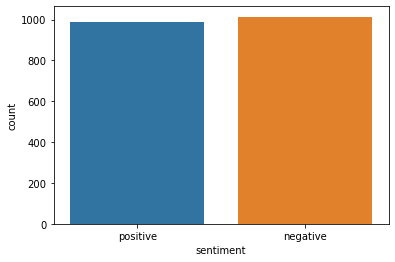

In [9]:
sns.countplot(x="sentiment", data=df_review)

### Value count of Sentiment Column

In [10]:
df_review["sentiment"].value_counts()

negative    1014
positive     986
Name: sentiment, dtype: int64

### Descriptive Statistics of Categorical Data

In [11]:
df_review.describe(include="object")

,review,sentiment
count,2000,2000
unique,2000,2
top,Sometimes good things happen by accident.<br /...,negative
freq,1,1014


### Splitting Dataset into Training and Testing

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_review, test_size=0.33, random_state=42)

X_train, y_train = train['review'], train['sentiment']
X_test, y_test = test['review'], test['sentiment']

* **X_train:** Independent variables (review) to train the model. Since we specified test_size = 0.33, 67% of observations from the data will be used
* **X_test:** The remaining 33% of independent variables that will be used to test the accuracy of the model
* **y_train:** Dependent variables (sentiment) or target/label that needs to be predicted
* **y_test:** Category labels that will be used to test the accuracy between actual and predicted categories

## **Feature Encoding**
### Term Frequency, Inverse Document Frequency (TF-IDF):
To identify unique words for positive reviews and negative reviews, we choose TF-IDF for encoding

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(X_train)
train_x_vector

<1340x21217 sparse matrix of type '<class 'numpy.float64'>'
	with 123952 stored elements in Compressed Sparse Row format>

The train_x_vector is a sparse matrix with a shape of 1340 <br>
reviews and 20817 words (whole vocabulary used in the reviews)

### Displaying the Sparse Matrix
A spare matrix usually has sparsed data with a lot of zeroes between them

In [14]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=X_train.index,
                                  columns=tfidf.get_feature_names())

,00,000,007,02,06,10,100,1000,1000000,100s,...,zor,zorba,zorro,zu,zuccon,zulu,zurich,zzzzzzzzzzzzz,zázvorková,édith
16042,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48107,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13289,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19928,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32069,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22642,0.0,0.0,0.0,0.0,0.0,0.115197,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44440,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39552,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20158,0.0,0.0,0.0,0.0,0.0,0.000000,0.090387,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Feature Encoding X_test using TF_IDF

In [15]:
test_x_vector = tfidf.transform(X_test)
test_x_vector

<660x21217 sparse matrix of type '<class 'numpy.float64'>'
	with 54686 stored elements in Compressed Sparse Row format>

## **Modelling**

### ML Algorithms
Using commonly used Classification ML Algorithms

In [16]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier # K Nearest Neighbour
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.svm import SVC # Support Vector Machine

### Model Training

In [17]:
lor = LogisticRegression()
lor.fit(train_x_vector, y_train)

dt = DecisionTreeClassifier()
dt.fit(train_x_vector, y_train)

rf = RandomForestClassifier()
rf.fit(train_x_vector, y_train)

knn = KNeighborsClassifier()
knn.fit(train_x_vector, y_train)

nb = GaussianNB()
nb.fit(train_x_vector.toarray(), y_train)

svc = SVC(kernel='linear')
svc.fit(train_x_vector, y_train)

SVC(kernel='linear')

### Manual Model Testing

In [24]:
print(svc.predict(tfidf.transform(['Avatar was a good movie'])))
print(svc.predict(tfidf.transform(['Loved Harry Potter Series'])))
print(svc.predict(tfidf.transform(['I do not like movies'])))

['positive']
['positive']
['negative']


## **Model Evaluation**

### Test Scores

In [25]:
print(f"Logistic Regression: {lor.score(test_x_vector, y_test)}")
print(f"Decision Tree: {dt.score(test_x_vector, y_test)}")
print(f"Random Forest: {rf.score(test_x_vector, y_test)}")
print(f"K-Nearest Neighbor: {knn.score(test_x_vector, y_test)}")
print(f"Naive Bayes: {nb.score(test_x_vector.toarray(), y_test)}")
print(f"Support Vector Machine: {svc.score(test_x_vector, y_test)}")

Logistic Regression: 0.8181818181818182
Decision Tree: 0.6848484848484848
Random Forest: 0.7924242424242425
K-Nearest Neighbor: 0.6651515151515152
Naive Bayes: 0.6212121212121212
Support Vector Machine: 0.8484848484848485


**It looks like SVM performed the best with 0.84 (84%) mean accuracy.**

### F1 Score
* F1 Score is the weighted average of Precision and Recall. 
* Accuracy is used when the True Positives and True negatives are more important
* F1-score is used when the False Negatives and False Positives are crucial.
* F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.
* **F1 Score = 2*(Recall * Precision) / (Recall + Precision)**
* F1 score reaches its best value at 1 and worst score at 0.

In [26]:
from sklearn.metrics import f1_score

print(f"SVM F1: {f1_score(y_test, svc.predict(test_x_vector),labels=['positive', 'negative'],average=None)}")

SVM F1: [0.85074627 0.84615385]


**The scores obtained for positive labels is 0.85, while negative labels is 0.84.**

### Classification Report
To view accuracy and F1 score altogether we can use Classification report

In [27]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc.predict(test_x_vector), labels=['positive', 'negative']))

              precision    recall  f1-score   support

    positive       0.83      0.87      0.85       327
    negative       0.87      0.83      0.85       333

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



### Confusion Matrix
We've two sentiments Postive and Negative related to reviews. These are 2 classes. Keep that in mind now:
* **True Positive (TP):** Model correctly predicted Positives (1st class)
* **False Positive (FP):** Model incorrectly predicted Positives

* **True Negative (TN):** Model correctly predicted Negatives (2nd class)
* **False Negative (FN):** Model incorrectly predicted Negatives 


In [28]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, svc.predict(test_x_vector), labels=['positive', 'negative'])
conf_mat

array([[285,  42],
       [ 58, 275]], dtype=int64)

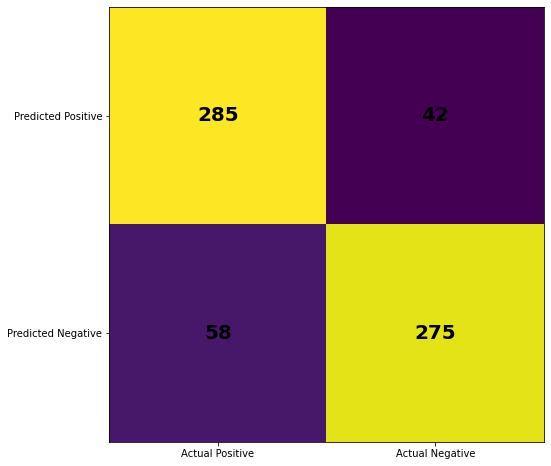

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_mat)
ax.yaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive', 'Predicted Negative'))
ax.xaxis.set(ticks=(0, 1), ticklabels=('Actual Positive', 'Actual Negative'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center',fontsize=20, fontweight=1000, color='black')
plt.show()

We can see that model correctly predicted **285 positives (TP), 275 negatives (TN)**<br>
The errors were **42 incorrect positives (FP) and 58 incorrect negatives**

## **Hyper-Parameter Tunning**

### K-Fold and Grid Search CV for SVM

In [30]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
#set the parameters
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']

# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=svc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search.fit(train_x_vector, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale'],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
### K-Fold and Grid Search CV for Logistic Regression

# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.model_selection import GridSearchCV
# #set the parameters
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# grid_search = GridSearchCV(estimator=lor, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# grid_search.fit(train_x_vector, y_train)

In [31]:
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
SVC(C=50)


**Above we get the Tunned Hyper-Parameters. Lets test them out**

In [32]:
svc = SVC(C=50, gamma="scale", kernel="rbf")
svc.fit(train_x_vector, y_train)
print(f"SVM after Hyperparameter-Tunning: {svc.score(test_x_vector, y_test)}")

SVM after Hyperparameter-Tunning: 0.8424242424242424


In [34]:
svc = SVC(kernel='linear')
svc.fit(train_x_vector, y_train)
print(f"SVM without Hyperparamter-Tunning: {svc.score(test_x_vector, y_test)}")

SVM without Hyperparamter-Tunning: 0.8484848484848485


**As we can see that our Original accuracy was 0.848 while after Hyperparameter-Tunning it became 0.842<br>
It indicates that we don't need to Tune parameters any further.**

For more about Hyper-Tunning of Classification Algorithms do visit:<br>
https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/